In [ ]:
!git clone https://git@github.com/NadaAdelMousa/Dry-Beans-Classification.git

Cloning into 'Dry-Beans-Classification'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('/content/Dry-Beans-Classification/train.csv',index_col='ID')
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [ ]:
df.isna().sum().sum()

0

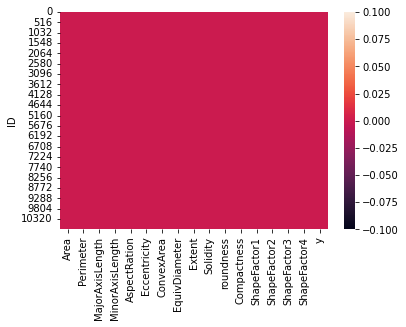

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

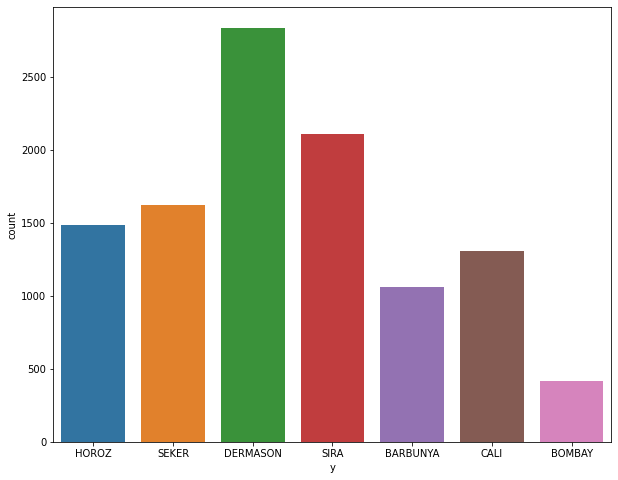

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="y", data=df);

In [ ]:
df.shape

(10834, 17)

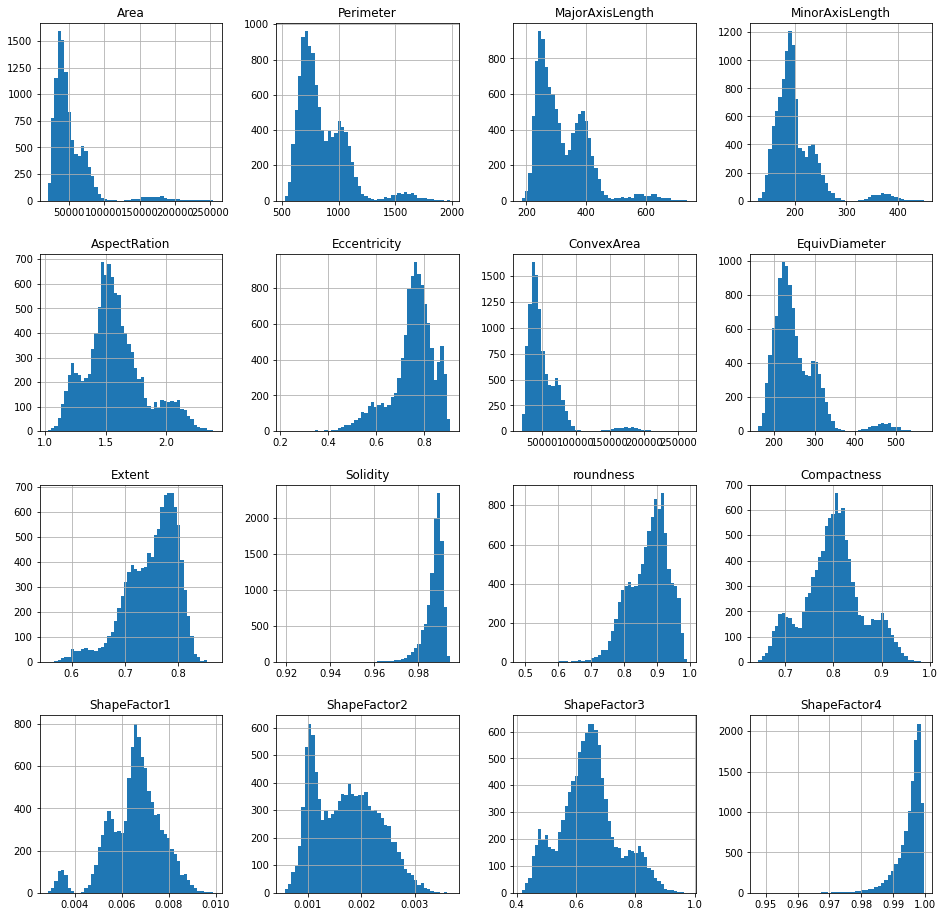

In [ ]:
df.hist(bins=50,figsize=(16,16))
plt.show()

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

In [ ]:
#less repeated class
BOMBAY_class=len(df[df['y']=='BOMBAY'])
print(BOMBAY_class)

418


In [ ]:
#most repeated class
DERMASON_class=len(df[df['y']=='DERMASON'])
print(DERMASON_class)

2837


In [ ]:
BOMBAY_idx=df[df['y']=='BOMBAY'].index
BOMBAY_idx

Int64Index([   18,    21,    38,    47,    89,   135,   142,   174,   176,
              179,
            ...
            10391, 10405, 10449, 10477, 10508, 10596, 10628, 10726, 10789,
            10790],
           dtype='int64', name='ID', length=418)

In [ ]:
#first major
DERMASON_idx=df[df['y']=='DERMASON'].index
DERMASON_idx

Int64Index([    2,     3,    14,    19,    20,    23,    25,    26,    29,
               30,
            ...
            10775, 10780, 10781, 10788, 10801, 10813, 10814, 10821, 10830,
            10833],
           dtype='int64', name='ID', length=2837)

In [ ]:
random_majority_indices=np.random.choice(DERMASON_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([BOMBAY_idx,random_majority_indices])

In [ ]:
#second major
SIRA_idx=df[df['y']=='SIRA'].index
random_majority_indices=np.random.choice(SIRA_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
len(under_sample_indices)

1254

In [ ]:
#third majority class
SEKER_idx=df[df['y']=='SEKER'].index
random_majority_indices=np.random.choice(SEKER_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
#fourth majority class 
HOROZ_idx=df[df['y']=='HOROZ'].index
random_majority_indices=np.random.choice(HOROZ_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
print(under_sample_indices.shape)

(2090,)


In [ ]:
#fifth majority class
CALI_idx=df[df['y']=='CALI'].index
random_majority_indices=np.random.choice(CALI_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
#six majority class
BARBUNYA_idx=df[df['y']=='BARBUNYA'].index
random_majority_indices=np.random.choice(BARBUNYA_idx,len(BOMBAY_idx),replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])

In [ ]:
data=df.loc[under_sample_indices]
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
18,162230,1486.167,543.407255,381.837178,1.423139,0.711514,163470,454.486140,0.782835,0.992415,0.923009,0.836364,0.003350,0.001011,0.699504,0.995492,BOMBAY
21,203688,1738.084,676.058986,389.116090,1.737422,0.817756,207028,509.257908,0.788071,0.983867,0.847293,0.753274,0.003319,0.000659,0.567422,0.985852,BOMBAY
38,139639,1379.183,473.780598,376.550241,1.258214,0.606901,140541,421.656136,0.783916,0.993582,0.922514,0.889982,0.003393,0.001313,0.792068,0.996590,BOMBAY
47,152063,1455.551,524.784869,371.247487,1.413572,0.706785,153860,440.014346,0.764451,0.988321,0.901942,0.838466,0.003451,0.001052,0.703025,0.993777,BOMBAY
89,197245,1702.646,642.077245,396.085390,1.621058,0.787056,200777,501.138837,0.802083,0.982408,0.855002,0.780496,0.003255,0.000745,0.609174,0.987507,BOMBAY


In [ ]:
data['y'].value_counts()

BOMBAY      418
DERMASON    418
SIRA        418
SEKER       418
HOROZ       418
CALI        418
BARBUNYA    418
Name: y, dtype: int64

In [ ]:
data.shape

(2926, 17)

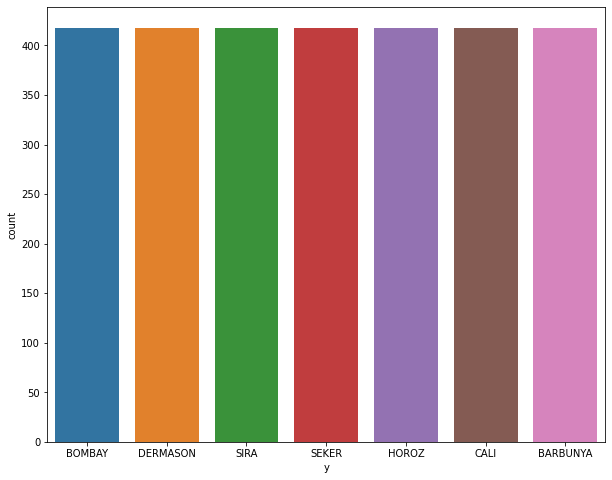

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="y", data=data);

In [ ]:
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()
# data['y']= label_encoder.fit_transform(data['y'])
# data['y'].unique()
#y = LabelEncoder().fit_transform(y.astype('str'))

In [ ]:
data.replace(['BOMBAY','DERMASON','SIRA','SEKER', 'HOROZ', 'CALI','BARBUNYA'], [0,1,2,3,4,5,6], inplace=True)

In [ ]:
data['y'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
df.columns.tolist()

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'y']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataa = data.copy()
X=dataa.drop(['y'],axis=1).copy()

y = dataa['y']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
6        ConvexArea  8.598211e+07
0              Area  8.477889e+07
1         Perimeter  2.496427e+05
2   MajorAxisLength  9.870980e+04
7     EquivDiameter  7.065406e+04
3   MinorAxisLength  5.489677e+04
4      AspectRation  8.974098e+01
14     ShapeFactor3  3.538445e+01
5      Eccentricity  2.411991e+01
11      Compactness  1.109673e+01


[0.08317501 0.08133914 0.06479465 0.07070705 0.07097948 0.0517253
 0.06225933 0.0899928  0.0121616  0.01719856 0.05565204 0.0908984
 0.07435616 0.06585703 0.08156498 0.02733849]


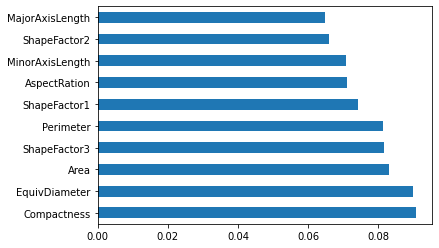

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
dataa = data.copy()
X=dataa.drop(['y'],axis=1).copy()
y = dataa['y'] 
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [ ]:
data.drop(['ShapeFactor4','Extent','Solidity','roundness','ShapeFactor2','Eccentricity'], axis=1, inplace=True)

In [ ]:
data.shape

(2926, 11)

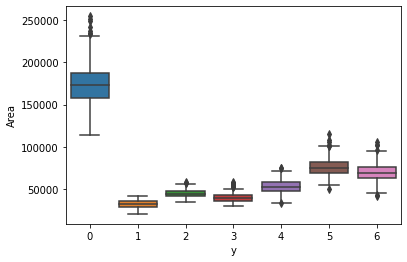

In [ ]:
sns.boxplot(x=data.y,y=data.Area)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

In [ ]:
def outlierdetection(data):

    sorted(data)    
    Q1,Q3=np.percentile(data,[25,75])
    IQR=Q3-Q1  
    lower_range=Q1-(1.5*IQR)
    Upper_range=Q3+(1.5*IQR)

    return lower_range,Upper_range
  

In [ ]:
y_0_area=data[data.y == 0].Area
lr,ur=outlierdetection(y_0_area)
data.drop(data.index[(data.y ==0) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.Area >= ur)],inplace=True)

In [ ]:
y_1_area=data[data.y == 1].Area
lr,ur=outlierdetection(y_1_area)
data.drop(data.index[(data.y ==1) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.Area >= ur)],inplace=True)

In [ ]:
y_2_area=data[data.y == 2].Area
lr,ur=outlierdetection(y_2_area)
data.drop(data.index[(data.y ==2) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.Area >= ur)],inplace=True)

In [ ]:
y_3_area=data[data.y == 3].Area
lr,ur=outlierdetection(y_3_area)
data.drop(data.index[(data.y ==3) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.Area >= ur)],inplace=True)

In [ ]:
y_4_area=data[data.y == 4].Area
lr,ur=outlierdetection(y_4_area)
data.drop(data.index[(data.y ==4) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.Area >= ur)],inplace=True)

In [ ]:
y_5_area=data[data.y == 5].Area
lr,ur=outlierdetection(y_5_area)
data.drop(data.index[(data.y ==5) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.Area >= ur)],inplace=True)

In [ ]:
y_6_area=data[data.y == 6].Area
lr,ur=outlierdetection(y_6_area)
data.drop(data.index[(data.y ==6) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.Area >= ur)],inplace=True)

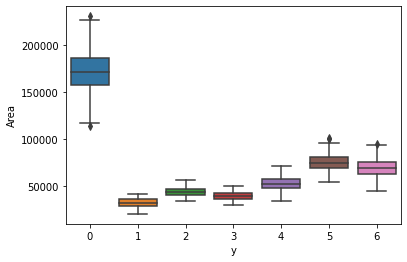

In [ ]:
sns.boxplot(x='y',y='Area',data=data)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

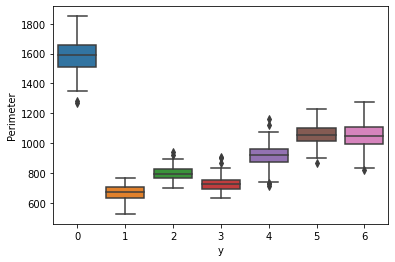

In [ ]:
#Perimeter before removing outliers
sns.boxplot(x=data.y,y=data.Perimeter)

In [ ]:
y_0_Perimeter=data[data.y == 0].Perimeter
lr,ur=outlierdetection(y_0_Perimeter)
data.drop(data.index[(data.y ==0) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.Perimeter >= ur)],inplace=True)

In [ ]:
y_1_Perimeter=data[data.y == 1].Perimeter
lr,ur=outlierdetection(y_1_Perimeter)
data.drop(data.index[(data.y ==1) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.Perimeter >= ur)],inplace=True)

In [ ]:
y_2_Perimeter=data[data.y == 2].Perimeter
lr,ur=outlierdetection(y_2_Perimeter)
data.drop(data.index[(data.y ==2) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.Perimeter >= ur)],inplace=True)

In [ ]:
y_3_Perimeter=data[data.y == 3].Perimeter
lr,ur=outlierdetection(y_3_Perimeter)
data.drop(data.index[(data.y ==3) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.Perimeter >= ur)],inplace=True)

In [ ]:
y_4_Perimeter=data[data.y == 4].Perimeter
lr,ur=outlierdetection(y_4_Perimeter)
data.drop(data.index[(data.y ==4) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.Perimeter >= ur)],inplace=True)

In [ ]:
y_5_Perimeter=data[data.y == 5].Perimeter
lr,ur=outlierdetection(y_5_Perimeter)
data.drop(data.index[(data.y ==5) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.Perimeter >= ur)],inplace=True)

In [ ]:
y_6_Perimeter=data[data.y == 6].Perimeter
lr,ur=outlierdetection(y_6_Perimeter)
data.drop(data.index[(data.y ==6) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.Perimeter >= ur)],inplace=True)

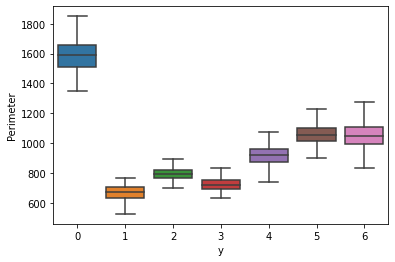

In [ ]:
#Perimeter after removing outliers
sns.boxplot(x=data.y,y=data.Perimeter)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

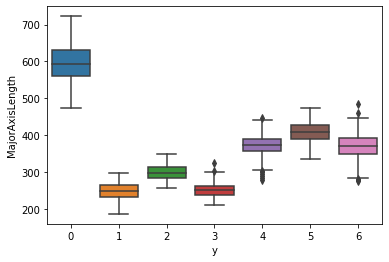

In [ ]:
#MajorAxisLength before removing outliers
sns.boxplot(x=data.y,y=data.MajorAxisLength)

In [ ]:
y_0_MajorAxisLength=data[data.y ==0].MajorAxisLength
lr,ur=outlierdetection(y_0_MajorAxisLength)
data.drop(data.index[(data.y ==0) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.MajorAxisLength >= ur)],inplace=True)

In [ ]:
y_1_MajorAxisLength=data[data.y ==1].MajorAxisLength
lr,ur=outlierdetection(y_1_MajorAxisLength)
data.drop(data.index[(data.y ==1) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.MajorAxisLength >= ur)],inplace=True)

In [ ]:
y_2_MajorAxisLength=data[data.y ==2].MajorAxisLength
lr,ur=outlierdetection(y_2_MajorAxisLength)
data.drop(data.index[(data.y ==2) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.MajorAxisLength >= ur)],inplace=True)

In [ ]:
y_3_MajorAxisLength=data[data.y ==3].MajorAxisLength
lr,ur=outlierdetection(y_3_MajorAxisLength)
data.drop(data.index[(data.y ==3) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.MajorAxisLength >= ur)],inplace=True)

In [ ]:
y_4_MajorAxisLength=data[data.y ==4].MajorAxisLength
lr,ur=outlierdetection(y_4_MajorAxisLength)
data.drop(data.index[(data.y ==4) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.MajorAxisLength >= ur)],inplace=True)

In [ ]:
y_5_MajorAxisLength=data[data.y ==5].MajorAxisLength
lr,ur=outlierdetection(y_5_MajorAxisLength)
data.drop(data.index[(data.y ==5) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.MajorAxisLength >= ur)],inplace=True)

In [ ]:
y_6_MajorAxisLength=data[data.y ==6].MajorAxisLength
lr,ur=outlierdetection(y_6_MajorAxisLength)
data.drop(data.index[(data.y ==6) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.MajorAxisLength >= ur)],inplace=True)

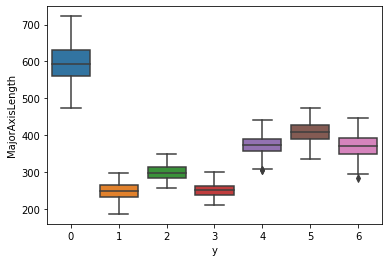

In [ ]:
#MajorAxisLength after removing outliers
sns.boxplot(x=data.y,y=data.MajorAxisLength)

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

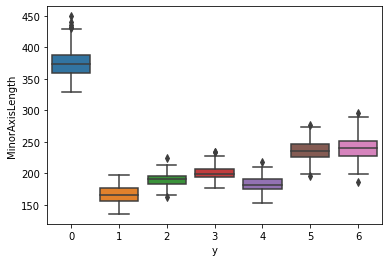

In [ ]:
#MajorAxisLength after removing outliers
sns.boxplot(x=data.y,y=data.MinorAxisLength)

In [ ]:
y_0_MinorAxisLength=data[data.y ==0].MinorAxisLength
lr,ur=outlierdetection(y_0_MinorAxisLength)
data.drop(data.index[(data.y ==0) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.MinorAxisLength >= ur)],inplace=True)

y_1_MinorAxisLength=data[data.y ==1].MinorAxisLength
lr,ur=outlierdetection(y_1_MinorAxisLength)
data.drop(data.index[(data.y ==1) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.MinorAxisLength >= ur)],inplace=True)

y_2_MinorAxisLength=data[data.y ==2].MinorAxisLength
lr,ur=outlierdetection(y_2_MinorAxisLength)
data.drop(data.index[(data.y ==2) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.MinorAxisLength >= ur)],inplace=True)

y_3_MinorAxisLength=data[data.y ==3].MinorAxisLength
lr,ur=outlierdetection(y_3_MinorAxisLength)
data.drop(data.index[(data.y ==3) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.MinorAxisLength >= ur)],inplace=True)

y_4_MinorAxisLength=data[data.y ==4].MinorAxisLength
lr,ur=outlierdetection(y_4_MinorAxisLength)
data.drop(data.index[(data.y ==4) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.MinorAxisLength >= ur)],inplace=True)

y_5_MinorAxisLength=data[data.y ==5].MinorAxisLength
lr,ur=outlierdetection(y_5_MinorAxisLength)
data.drop(data.index[(data.y ==5) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.MinorAxisLength >= ur)],inplace=True)

y_6_MinorAxisLength=data[data.y ==6].MinorAxisLength
lr,ur=outlierdetection(y_6_MinorAxisLength)
data.drop(data.index[(data.y ==6) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.MinorAxisLength >= ur)],inplace=True)

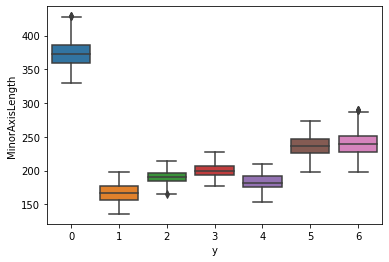

In [ ]:
#MinorAxisLength after removing outliers
sns.boxplot(x=data.y,y=data.MinorAxisLength)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

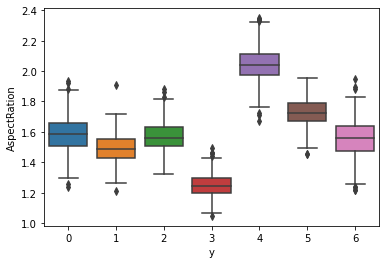

In [ ]:
#AspectRation before removing outliers
sns.boxplot(x=data.y,y=data.AspectRation)

In [ ]:
y_0_AspectRation=data[data.y ==0].AspectRation
lr,ur=outlierdetection(y_0_AspectRation)
data.drop(data.index[(data.y ==0) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.AspectRation >= ur)],inplace=True)

y_1_AspectRation=data[data.y ==1].AspectRation
lr,ur=outlierdetection(y_1_AspectRation)
data.drop(data.index[(data.y ==1) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.AspectRation >= ur)],inplace=True)

y_2_AspectRation=data[data.y ==2].AspectRation
lr,ur=outlierdetection(y_2_AspectRation)
data.drop(data.index[(data.y ==2) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.AspectRation >= ur)],inplace=True)

y_3_AspectRation=data[data.y ==3].AspectRation
lr,ur=outlierdetection(y_3_AspectRation)
data.drop(data.index[(data.y ==3) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.AspectRation >= ur)],inplace=True)

y_4_AspectRation=data[data.y ==4].AspectRation
lr,ur=outlierdetection(y_4_AspectRation)
data.drop(data.index[(data.y ==4) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.AspectRation >= ur)],inplace=True)

y_5_AspectRation=data[data.y ==5].AspectRation
lr,ur=outlierdetection(y_5_AspectRation)
data.drop(data.index[(data.y ==5) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.AspectRation >= ur)],inplace=True)

y_6_AspectRation=data[data.y ==6].AspectRation
lr,ur=outlierdetection(y_6_AspectRation)
data.drop(data.index[(data.y ==6) &( data.AspectRation <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.AspectRation >= ur)],inplace=True)

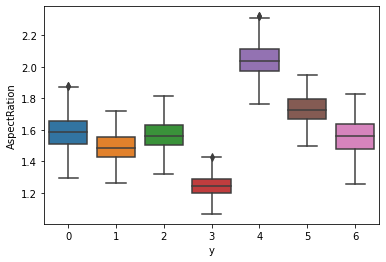

In [ ]:
#AspectRation after removing outliers
sns.boxplot(x=data.y,y=data.AspectRation)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

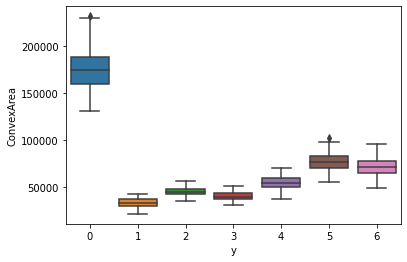

In [ ]:
#ConvexArea before removing outliers
sns.boxplot(x=data.y,y=data.ConvexArea)

In [ ]:
y_0_ConvexArea=data[data.y ==0].ConvexArea
lr,ur=outlierdetection(y_0_ConvexArea)
data.drop(data.index[(data.y ==0) &( data.ConvexArea <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.ConvexArea >= ur)],inplace=True)

y_2_ConvexArea=data[data.y ==2].ConvexArea
lr,ur=outlierdetection(y_2_ConvexArea)
data.drop(data.index[(data.y ==2) &( data.ConvexArea <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.ConvexArea >= ur)],inplace=True)

y_3_ConvexArea=data[data.y ==3].ConvexArea
lr,ur=outlierdetection(y_3_ConvexArea)
data.drop(data.index[(data.y ==3) &( data.ConvexArea <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.ConvexArea >= ur)],inplace=True)

y_5_ConvexArea=data[data.y ==5].ConvexArea
lr,ur=outlierdetection(y_5_ConvexArea)
data.drop(data.index[(data.y ==5) &( data.ConvexArea <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.ConvexArea >= ur)],inplace=True)


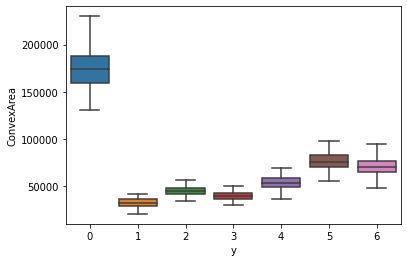

In [ ]:
#ConvexArea after removing outliers
sns.boxplot(x=data.y,y=data.ConvexArea)

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

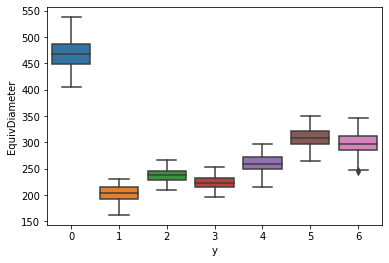

In [ ]:
#EquivDiameter before removing outliers
sns.boxplot(x=data.y,y=data.EquivDiameter)

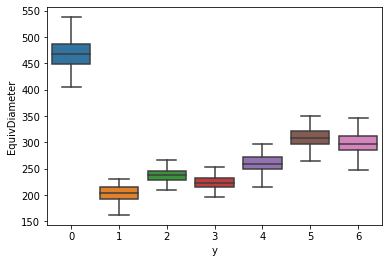

In [ ]:
y_4_EquivDiameter=data[data.y ==4].EquivDiameter
lr,ur=outlierdetection(y_4_EquivDiameter)
data.drop(data.index[(data.y ==4) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.EquivDiameter >= ur)],inplace=True)

y_6_EquivDiameter=data[data.y ==6].EquivDiameter
lr,ur=outlierdetection(y_6_EquivDiameter)
data.drop(data.index[(data.y ==6) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.EquivDiameter >= ur)],inplace=True)
#EquivDiameter after removing outliers
sns.boxplot(x=data.y,y=data.EquivDiameter)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

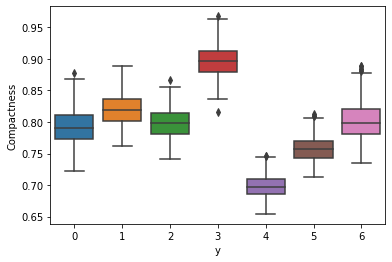

In [ ]:
#Compactness before removing outliers
sns.boxplot(x=data.y,y=data.Compactness)

In [ ]:
y_0_Compactness=data[data.y ==0].Compactness
lr,ur=outlierdetection(y_0_Compactness)
data.drop(data.index[(data.y ==0) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.Compactness >= ur)],inplace=True)

y_1_Compactness=data[data.y ==1].Compactness
lr,ur=outlierdetection(y_1_Compactness)
data.drop(data.index[(data.y ==1) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.Compactness >= ur)],inplace=True)

y_2_Compactness=data[data.y ==2].Compactness
lr,ur=outlierdetection(y_2_Compactness)
data.drop(data.index[(data.y ==2) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.Compactness >= ur)],inplace=True)

y_3_Compactness=data[data.y ==3].Compactness
lr,ur=outlierdetection(y_3_Compactness)
data.drop(data.index[(data.y ==3) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.Compactness >= ur)],inplace=True)

y_4_Compactness=data[data.y ==4].Compactness
lr,ur=outlierdetection(y_4_Compactness)
data.drop(data.index[(data.y ==4) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.Compactness >= ur)],inplace=True)

y_5_Compactness=data[data.y ==5].Compactness
lr,ur=outlierdetection(y_5_Compactness)
data.drop(data.index[(data.y ==5) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.Compactness >= ur)],inplace=True)

y_6_Compactness=data[data.y ==6].Compactness
lr,ur=outlierdetection(y_6_Compactness)
data.drop(data.index[(data.y ==6) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.Compactness >= ur)],inplace=True)

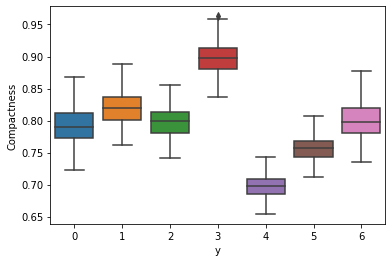

In [ ]:
#Compactness before after outliers
sns.boxplot(x=data.y,y=data.Compactness)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

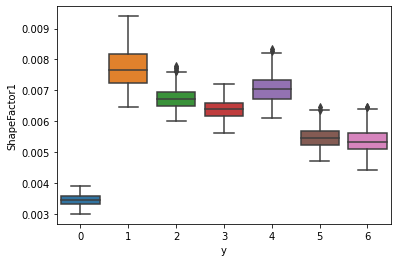

In [ ]:
#ShapeFactor1 before after outliers
sns.boxplot(x=data.y,y=data.ShapeFactor1)

In [ ]:
y_0_ShapeFactor1=data[data.y ==0].ShapeFactor1
lr,ur=outlierdetection(y_0_ShapeFactor1)
data.drop(data.index[(data.y ==0) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.ShapeFactor1 >= ur)],inplace=True)

y_1_ShapeFactor1=data[data.y ==1].ShapeFactor1
lr,ur=outlierdetection(y_1_ShapeFactor1)
data.drop(data.index[(data.y ==1) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.ShapeFactor1 >= ur)],inplace=True)

y_2_ShapeFactor1=data[data.y ==2].ShapeFactor1
lr,ur=outlierdetection(y_2_ShapeFactor1)
data.drop(data.index[(data.y ==2) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.ShapeFactor1 >= ur)],inplace=True)

y_3_ShapeFactor1=data[data.y ==3].ShapeFactor1
lr,ur=outlierdetection(y_3_ShapeFactor1)
data.drop(data.index[(data.y ==3) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.ShapeFactor1 >= ur)],inplace=True)

y_4_ShapeFactor1=data[data.y ==4].ShapeFactor1
lr,ur=outlierdetection(y_4_ShapeFactor1)
data.drop(data.index[(data.y ==4) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.ShapeFactor1 >= ur)],inplace=True)

y_5_ShapeFactor1=data[data.y ==5].ShapeFactor1
lr,ur=outlierdetection(y_5_ShapeFactor1)
data.drop(data.index[(data.y ==5) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.ShapeFactor1 >= ur)],inplace=True)

y_6_ShapeFactor1=data[data.y ==6].ShapeFactor1
lr,ur=outlierdetection(y_6_ShapeFactor1)
data.drop(data.index[(data.y ==6) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.ShapeFactor1 >= ur)],inplace=True)

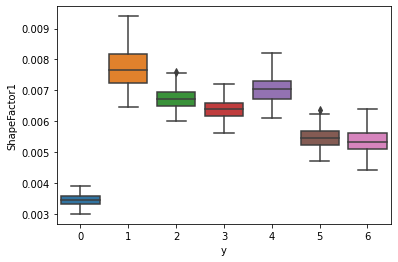

In [ ]:
#ShapeFactor1 after remove outliers
sns.boxplot(x=data.y,y=data.ShapeFactor1)

In [ ]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'ConvexArea', 'EquivDiameter', 'Compactness',
       'ShapeFactor1', 'ShapeFactor3', 'y'],
      dtype='object')

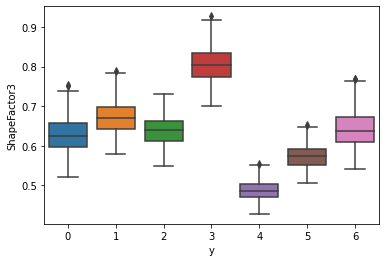

In [ ]:
#ShapeFactor3 before remove outliers
sns.boxplot(x=data.y,y=data.ShapeFactor3)

In [ ]:
y_0_ShapeFactor3=data[data.y ==0].ShapeFactor3
lr,ur=outlierdetection(y_0_ShapeFactor3)
data.drop(data.index[(data.y ==0) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==0) &( data.ShapeFactor3 >= ur)],inplace=True)

y_1_ShapeFactor3=data[data.y ==1].ShapeFactor3
lr,ur=outlierdetection(y_1_ShapeFactor3)
data.drop(data.index[(data.y ==1) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==1) &( data.ShapeFactor3 >= ur)],inplace=True)


y_2_ShapeFactor3=data[data.y ==2].ShapeFactor3
lr,ur=outlierdetection(y_2_ShapeFactor3)
data.drop(data.index[(data.y ==2) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==2) &( data.ShapeFactor3 >= ur)],inplace=True)

y_3_ShapeFactor3=data[data.y ==3].ShapeFactor3
lr,ur=outlierdetection(y_3_ShapeFactor3)
data.drop(data.index[(data.y ==3) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==3) &( data.ShapeFactor3 >= ur)],inplace=True)


y_4_ShapeFactor3=data[data.y ==4].ShapeFactor3
lr,ur=outlierdetection(y_4_ShapeFactor3)
data.drop(data.index[(data.y ==4) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==4) &( data.ShapeFactor3 >= ur)],inplace=True)

y_5_ShapeFactor3=data[data.y ==5].ShapeFactor3
lr,ur=outlierdetection(y_5_ShapeFactor3)
data.drop(data.index[(data.y ==5) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==5) &( data.ShapeFactor3 >= ur)],inplace=True)

y_6_ShapeFactor3=data[data.y ==6].ShapeFactor3
lr,ur=outlierdetection(y_6_ShapeFactor3)
data.drop(data.index[(data.y ==6) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.y ==6) &( data.ShapeFactor3 >= ur)],inplace=True)

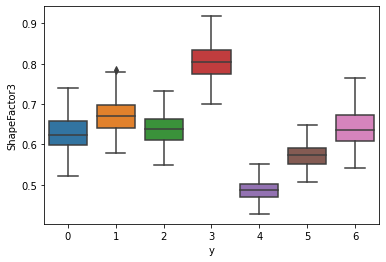

In [ ]:
#ShapeFactor3 after remove outliers
sns.boxplot(x=data.y,y=data.ShapeFactor3)

In [ ]:
# for col in range(len(data.columns)):
#   print('before removing outlier')
#   sns.boxplot(x=data.y,y=data.columns[0])
#   for label in list(data['y'].unique()):
#     label_col=data[data.y == label].globals()['col']
#     lr,ur=outlierdetection(label_col)
#     data.drop(data.index[(data.y ==label) &( data.col <= lr)&(data.col>=ur)],inplace=True)
#   print('after removing outlier')
#   sns.boxplot(x=data.y,y=data.col)

In [ ]:
data.shape

(2779, 11)

In [ ]:
X=data.drop(['y'],axis=1).copy()
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,ConvexArea,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor3
ID,,,,,,,,,,
18,162230,1486.167,543.407255,381.837178,1.423139,163470,454.486140,0.836364,0.003350,0.699504
21,203688,1738.084,676.058986,389.116090,1.737422,207028,509.257908,0.753274,0.003319,0.567422
47,152063,1455.551,524.784869,371.247487,1.413572,153860,440.014346,0.838466,0.003451,0.703025
89,197245,1702.646,642.077245,396.085390,1.621058,200777,501.138837,0.780496,0.003255,0.609174
135,141385,1429.427,525.900924,344.355118,1.527205,143530,424.284071,0.806776,0.003720,0.650887


In [ ]:
X.shape

(2779, 10)

In [ ]:
y=data['y'].copy()
y.shape

(2779,)

In [ ]:
y=y.values
y=y.reshape((-1,1))
y.shape

(2779, 1)

In [ ]:
################################################################





###################################################################

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

#you can make this bujt before splitting step 
# scaler = StandardScaler()
# scaledX =pd.DataFrame(scaler.fit_transform(X),index=df.index)
# # X=pd.DataFrame(X)
# scaledX.head()
# X_scaled= StandardScaler().fit_transform(X.values)
# X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
# X.head()  
   
sScalar=StandardScaler()    
X_train= sScalar.fit_transform(X_train) #scale train    
X_test= sScalar.transform(X_test) #apply the same for validation  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor=LogisticRegression(random_state=0)
regressor.fit(X_train,y_train)

print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9275753486279802
0.9172661870503597


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,activation='relu',early_stopping=True, hidden_layer_sizes=(8,6), random_state=0)

MLP_model=clf.fit(X_train,y_train)

print(MLP_model.score(X_train, y_train))
print(MLP_model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9505173189383715
0.9280575539568345


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
df_test=pd.read_csv('/content/Dry-Beans-Classification/test.csv',index_col='ID')
df_test.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [ ]:
df_test.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
df_test.drop(['ShapeFactor4','Extent','Solidity','roundness','ShapeFactor2','Eccentricity'], axis=1, inplace=True)

In [ ]:
df_test.shape

(2709, 10)

In [ ]:
df_test = pd.DataFrame(sScalar.transform(df_test.values), columns=df_test.columns,index=df_test.index)
df_test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,ConvexArea,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor3
ID,,,,,,,,,,
10834,-0.261275,-0.045967,0.216612,-0.457765,1.522394,-0.223902,-0.170180,-1.583656,0.515333,-1.515333
10835,-0.892010,-1.144604,-1.156489,-1.016065,-0.657458,-0.892599,-1.107606,0.614429,1.447147,0.586502
10836,-0.326385,-0.196065,-0.470115,-0.008718,-0.972498,-0.317121,-0.253840,0.978202,-0.275276,0.969683
10837,-0.978147,-1.320543,-1.293985,-1.194358,-0.623138,-0.978842,-1.267929,0.579213,1.912741,0.549940
10838,1.576998,1.567532,1.410415,1.808909,-0.361219,1.573555,1.644934,0.242198,-1.706290,0.204801


In [ ]:
y_pred_mlp=regressor.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_pred_mlp

array([4, 1, 6, ..., 4, 1, 2])

In [ ]:
#'y_pred_xgb=np.where([0,1,2,3,4,5,6],['BOMBAY','DERMASON','SIRA','SEKER', 'HOROZ', 'CALI','BARBUNYA'])
lst_xgb=[]
for el in y_pred_mlp:
  
  if(el==0):
    lst_xgb.append('BOMBAY')
  elif el==1:
      lst_xgb.append('DERMASON')
  elif el==2:
      lst_xgb.append('SIRA')

  elif el==3:
      lst_xgb.append('SEKER')

  elif el==4:
      lst_xgb.append('HOROZ')

  elif el==5:
      lst_xgb.append('CALI')

  else:
      lst_xgb.append('BARBUNYA')    



In [ ]:
last_test=pd.read_csv('/content/data_test.csv',index_col='ID')
y_label=last_test['y']
y_label=y_label.tolist()
type(y_label)

list

In [ ]:
from sklearn.metrics import confusion_matrix
print(print(confusion_matrix(y_label, lst_xgb)))

[[234   0  23   0   0   1   5]
 [  0 104   0   0   0   0   0]
 [ 23   0 297   0   4   0   0]
 [  0   0   0 643   0  12  53]
 [  2   0   3   0 354   0   4]
 [  2   0   0   1   0 390  12]
 [  1   0   3  38  15   9 476]]
None


In [ ]:
acc=0
for i in range(len(lst_xgb)):
  if(lst_xgb[i]==y_label[i]):
    acc+=1

print(acc/len(y_label))   

0.9221114802510151


In [ ]:
out_pred = pd.DataFrame({'ID': df_test.index,
                       'y': lst_xgb})
out_pred.to_csv('submission_v3_lgrg.csv', index=False)